## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 368us/step - loss: 1.9238 - acc: 0.3108 - val_loss: 1.7963 - val_acc: 0.3479
Epoch 2/100
50000/50000 [==============================] - 16s 322us/step - loss: 1.7167 - acc: 0.3852 - val_loss: 1.6778 - val_acc: 0.4002
Epoch 3/100
50000/50000 [==============================] - 17s 342us/step - loss: 1.6147 - acc: 0.4256 - val_loss: 1.5746 - val_acc: 0.4417
Epoch 4/100
50000/50000 [==============================] - 16s 313us/step - loss: 1.5487 - acc: 0.4467 - val_loss: 1.5729 - val_acc: 0.4377
Epoch 5/100
50000/50000 [==============================] - 15s 290us/step - loss: 1.5047 - acc: 0.4642 - val_loss: 1.4944 - val_acc: 0.4684
Epoch 6/100
50000/50000 [==============================] - 16s 326us/step - loss: 1.4700 - acc: 0.4752 - val_loss: 1.5290 - val_acc: 0.4488
Epoch 7/100
50000/50000 [==============================] - 15s

Epoch 57/100
50000/50000 [==============================] - 16s 323us/step - loss: 0.5367 - acc: 0.8092 - val_loss: 2.0252 - val_acc: 0.5078
Epoch 58/100
50000/50000 [==============================] - 17s 337us/step - loss: 0.5251 - acc: 0.8126 - val_loss: 1.9952 - val_acc: 0.5201
Epoch 59/100
50000/50000 [==============================] - 16s 324us/step - loss: 0.5171 - acc: 0.8135 - val_loss: 2.0853 - val_acc: 0.5013
Epoch 60/100
50000/50000 [==============================] - 17s 344us/step - loss: 0.5076 - acc: 0.8170 - val_loss: 2.0884 - val_acc: 0.4994
Epoch 61/100
50000/50000 [==============================] - 20s 401us/step - loss: 0.4968 - acc: 0.8207 - val_loss: 2.1395 - val_acc: 0.5068
Epoch 62/100
50000/50000 [==============================] - 23s 465us/step - loss: 0.5009 - acc: 0.8204 - val_loss: 2.1303 - val_acc: 0.5048
Epoch 63/100
50000/50000 [==============================] - 22s 442us/step - loss: 0.4707 - acc: 0.8335 - val_loss: 2.1933 - val_acc: 0.5066
Epoch 64/100


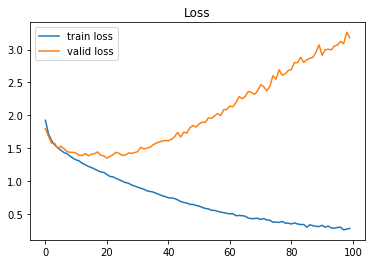

In [10]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

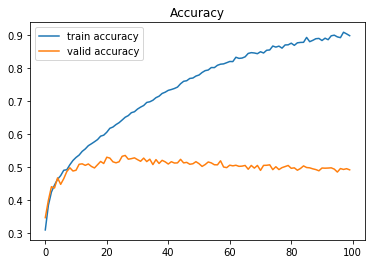

In [11]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢